# Statistical Analysis of Goodreads Dataset
Since the dataset does not have individual user data, a recommendation system from here will have to be content based. Exploring the statistics of the data, such as the average ratings and the number of text reviews, will help shape the idea of which pieces of the data can be used to generate the recommendations.

In [1]:
# Import Modules and Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Import clean dataset as df
df = pd.read_csv('Clean_data\clean_books.csv').drop(columns = 'Unnamed: 0')
df.head()

,bookID,title,primary_a,secondary_a,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,NaN,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


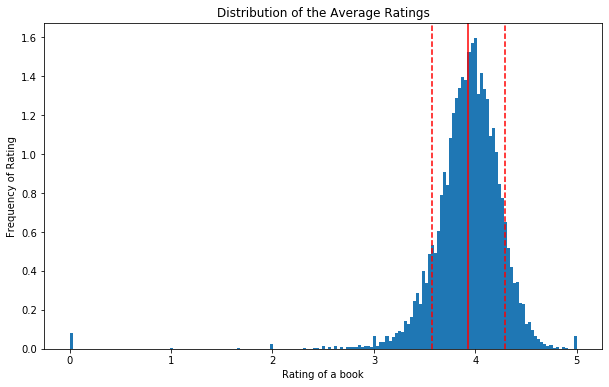

In [3]:
# Observing distribution of average ratings

# Obtain mean of average ratings
mean = np.mean(df.average_rating)

# Standard deviation
std = np.std(df.average_rating, ddof=1)

# Plot histogram distrbtuion with mean and standard deviations
plt.subplots(figsize=(10,6))
plt.hist(df.average_rating, bins='auto', density=True)
plt.title('Distribution of the Average Ratings')
plt.axvline(mean, color='r')
plt.axvline(mean+std, color='r', linestyle='--')
plt.axvline(mean-std, color='r', linestyle='--')
plt.xlabel('Rating of a book')
plt.ylabel('Frequency of Rating')
plt.show()

The graph shows the distribution of the average ratings and has the mean marked with a solid red line. The mean is actually around 3.9 with a standard deviation of about 0.36. We can see that most of the data actually falls within + and - the standard deviation. Below, we look at the CDF to show a further breakdown of the histogram.

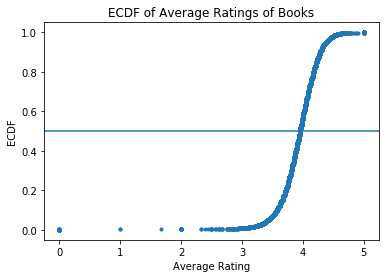

In [4]:
# create ECDF
ratings = df.average_rating

# Define ECDF
def ecdf(data):
    n = len(data)
    
    x = np.sort(data)
    
    y = np.arange(1, 1+n)/n
    
    return x, y

# plot ECDF

x_reveiws, y_reviews = ecdf(ratings)

plt.plot(x_reveiws, y_reviews, marker= '.', linestyle='none')
plt.xlabel('Average Rating')
plt.ylabel('ECDF')
plt.axhline(0.5)
plt.title('ECDF of Average Ratings of Books')
plt.show()

The plot is far to the right side of the graph, indicating that most of the ratings are actually close to 4. A line was added at the 50% mark to further emphasize the mean and standard deviation data above.

In [5]:
# Pearson correlation of average rating and ratings count
corr_1, p_val_1 = pearsonr(df.average_rating, df.ratings_count)
print(f'The pearson correlation is {corr_1} and the p-value is {p_val_1}')

The pearson correlation is 0.04123415446545705 and the p-value is 1.3624977303641972e-06


In [6]:
# Pearson correlation of ratings count and total text reviews
corr_2, p_val_2 = pearsonr(df.ratings_count, df.text_reviews_count)
print(f'The pearson correlation is {corr_2} and the p-value is {p_val_2}')

The pearson correlation is 0.8634672605242154 and the p-value is 0.0


Looking above, we see that there does not seem to be much of a correlation between the average rating for a book and the amount of ratings it recieved, especially compared to the correlation of total rating and total text reviews. However, the correlation between the average rating and rating count is still higher than any of the other significant comparison pairs to base a recommendaion system.